In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import nibabel as nb
import hrf_tools
import hcp_utils as hcp
from analysis import plot_59k_results

import matplotlib.pyplot as plt


In [11]:
subject=100610
feature='rms'
n_movies=4
scaler = StandardScaler()

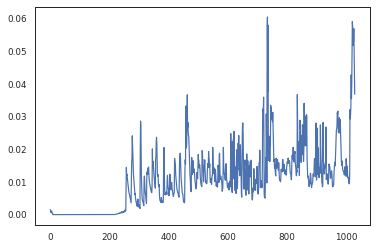

In [31]:
stim = ['tfMRI_MOVIE1_7T_AP','tfMRI_MOVIE2_7T_PA','tfMRI_MOVIE3_7T_PA','tfMRI_MOVIE4_7T_AP']
stim_feat = ['7T_MOVIE1_CC1_v2', '7T_MOVIE2_HO1_v2', '7T_MOVIE3_CC2_v2', '7T_MOVIE4_HO2_v2']
    
i=2
X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
plt.plot(X[7910:8940])

Text(0, 0.5, 'rms value')

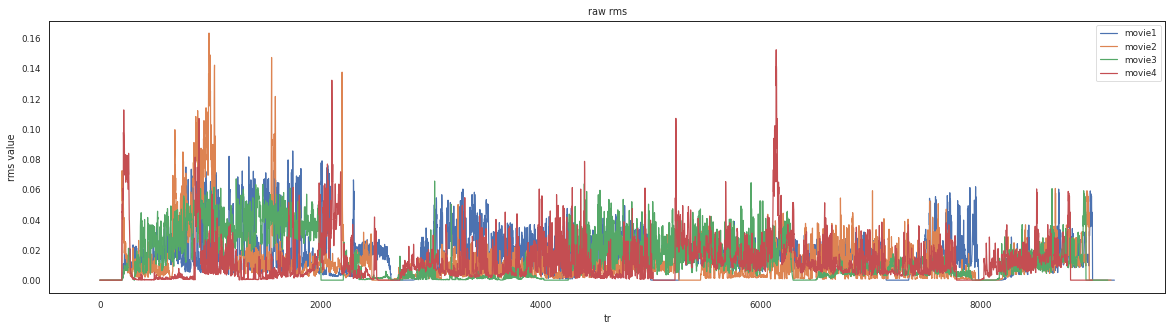

In [20]:
plt.figure(figsize=(20,5))
for i in np.arange(n_movies):
    X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
    plt.plot(X, label=f'movie{str(i+1)}')
    plt.legend()
plt.title('raw rms')
plt.xlabel('tr')
plt.ylabel('rms value')

Text(0, 0.5, 'rms value')

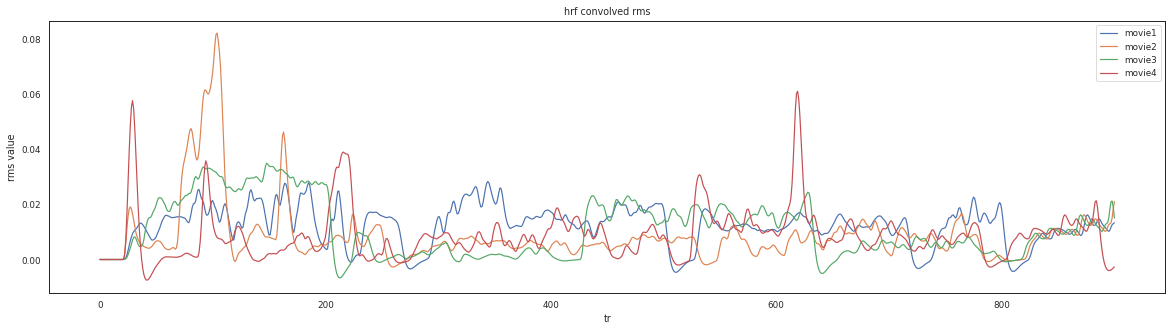

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for i in np.arange(n_movies):
    X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
    X = hrf_tools.apply_optimal_hrf_10hz(X,10)
    X = hrf_tools.resample_1hz(X)
    X = X[:Y.shape[0],:] # if it has one extra value
    plt.plot(X, label=f'movie{str(i+1)}')
    plt.legend()
plt.title('hrf convolved rms')
plt.xlabel('tr')
plt.ylabel('rms value')

Text(0, 0.5, 'rms value')

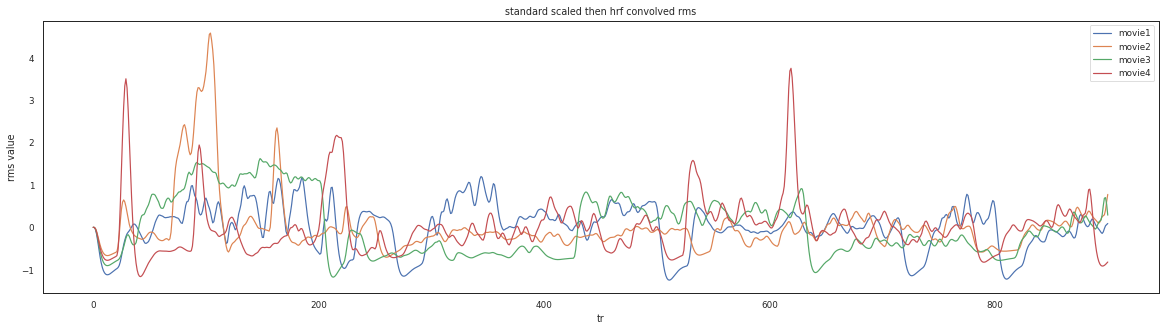

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for i in np.arange(n_movies):
    X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
    
    X = scaler.fit_transform(X)
    X = hrf_tools.apply_optimal_hrf_10hz(X,10)
    X = hrf_tools.resample_1hz(X)
    X = X[:Y.shape[0],:] # if it has one extra value
    
    plt.plot(X, label=f'movie{str(i+1)}')
    plt.legend()
plt.title('standard scaled then hrf convolved rms')
plt.xlabel('tr')
plt.ylabel('rms value')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Cannot load file ../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.sulc_1.6mm_MSMAll.59k_fs_LR.dscalar.nii with sulcal depth data
[0.11087047 0.11486528 0.16020068 ... 0.98310014 0.98855824 0.99438171]
[0.14800988 0.16985074 0.17875454 ... 0.98733303 0.99178168 0.99777462]
[0.11087047 0.11486528 0.16020068 ... 0.98310014 0.98855824 0.99438171]
[0.14800988 0.16985074 0.17875454 ... 0.98733303 0.99178168 0.99777462]


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Cannot load file ../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.sulc_1.6mm_MSMAll.59k_fs_LR.dscalar.nii with sulcal depth data
[0.26540087 0.27204459 0.27382254 ... 0.82131321 0.82348383 0.82351177]
[0.24468802 0.2506618  0.25152352 ... 0.82210282 0.82210323 0.82431647]
[0.26540087 0.27204459 0.27382254 ... 0.82131321 0.82348383 0.82351177]
[0.24468802 0.2506618  0.25152352 ... 0.82210282 0.82210323 0.82431647]


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Cannot load file ../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.sulc_1.6mm_MSMAll.59k_fs_LR.dscalar.nii with sulcal depth data
[0.16959302 0.18311313 0.1908608  ... 1.03941385 1.04127481 1.06242286]
[0.14049077 0.15504871 0.17711821 ... 1.09360706 1.0966258  1.10184949]
[0.16959302 0.18311313 0.1908608  ... 1.03941385 1.04127481 1.06242286]
[0.14049077 0.15504871 0.17711821 ... 1.09360706 1.0966258  1.10184949]


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Cannot load file ../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.sulc_1.6mm_MSMAll.59k_fs_LR.dscalar.nii with sulcal depth data
[0.23269165 0.23539798 0.23617454 ... 0.89631025 0.90258858 0.90717178]
[0.24179266 0.24788089 0.2512853  ... 0.89600336 0.90040741 0.90252641]
[0.23269165 0.23539798 0.23617454 ... 0.89631025 0.90258858 0.90717178]
[0.24179266 0.24788089 0.2512853  ... 0.89600336 0.90040741 0.90252641]


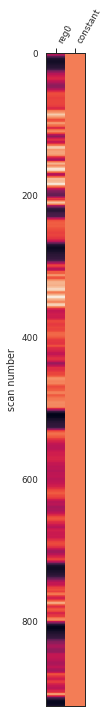

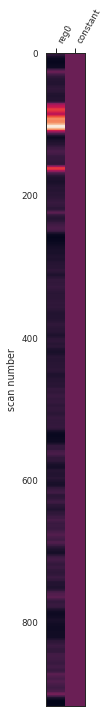

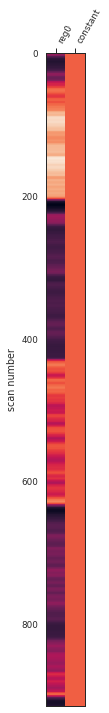

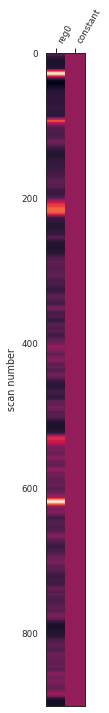

In [27]:
stim = ['tfMRI_MOVIE1_7T_AP','tfMRI_MOVIE2_7T_PA','tfMRI_MOVIE3_7T_PA','tfMRI_MOVIE4_7T_AP']
stim_feat = ['7T_MOVIE1_CC1_v2', '7T_MOVIE2_HO1_v2', '7T_MOVIE3_CC2_v2', '7T_MOVIE4_HO2_v2']
    
for i in np.arange(n_movies):
        
    im_file = f'../sourcedata/data/HCP_7T_movie_FIX/brain/HCP_7T_movie_FIX/100610/MNINonLinear/Results/{stim[i]}/{stim[i]}_Atlas_1.6mm_MSMAll_hp2000_clean.dtseries.nii'
    img = nb.load(im_file)
    img_y = img.get_fdata()
    Y = scaler.fit_transform(img_y)
    #load feature
    X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
    X = scaler.fit_transform(X)
    X = hrf_tools.apply_optimal_hrf_10hz(X,10)
    X = hrf_tools.resample_1hz(X)
    X = X[:Y.shape[0],:] # if it has one extra value

    n_scans = Y.shape[0]
    frame_times= np.arange(n_scans)

    from nilearn.glm.first_level import make_first_level_design_matrix
    design_matrix = make_first_level_design_matrix(frame_times, None,
                              add_regs=X, hrf_model=None, drift_model=None)

    from nilearn.plotting import plot_design_matrix
    plot_design_matrix(design_matrix)

    from nilearn.glm.first_level import run_glm
    labels,results = run_glm(Y,design_matrix.values)

    from nilearn.glm.contrasts import compute_contrast
    contrast = compute_contrast(labels=labels, \
                                regression_result=results, \
                                con_val=np.array([1,0]).T, \
                                contrast_type='t')
    vertex_info = hcp.get_HCP_vertex_info(img)
    #from analysis import plot_59k_results
    plot_59k_results(contrast.z_score(),'z',vertex_info,subject,feature,f'glm_movie{i+1}_scaled')
    #plot_59k_results(contrast.p_value(),'p',vertex_info,subject,feature,'glm1run_p')
    #plot_59k_results(contrast.effect_size(),'d',vertex_info,subject,feature,'glm1run_d')